<a href="https://colab.research.google.com/github/shubhamgautam1211/Machine-Learning-Standalone/blob/main/SG_15_DecisionTree_Forestfire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn import svm
from statistics import mean
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df = pd.read_csv("Forest.csv")
df["Classes  "] = df["Classes  "].str.strip()     # remove extra spaces
df["Classes  "].unique()

df.head()

,day,month,year,Region,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,Bejaia Region Dataset,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,Bejaia Region Dataset,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,Bejaia Region Dataset,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,Bejaia Region Dataset,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,Bejaia Region Dataset,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [ ]:
df.nunique()

day             31
month            4
year             1
Region           2
Temperature     19
 RH             62
 Ws             18
Rain            39
FFMC           173
DMC            166
DC             198
ISI            106
BUI            173
FWI            126
Classes          2
dtype: int64

In [ ]:
print(df.isnull().sum())

day            0
month          0
year           0
Region         0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Region       244 non-null    object 
 4   Temperature  244 non-null    int64  
 5    RH          244 non-null    int64  
 6    Ws          244 non-null    int64  
 7   Rain         244 non-null    float64
 8   FFMC         244 non-null    float64
 9   DMC          244 non-null    float64
 10  DC           244 non-null    float64
 11  ISI          244 non-null    float64
 12  BUI          244 non-null    float64
 13  FWI          244 non-null    float64
 14  Classes      244 non-null    object 
dtypes: float64(7), int64(6), object(2)
memory usage: 28.7+ KB


In [ ]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288115,4.759836,16.673361,7.049180
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619662,4.154628,14.201648,7.428366
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.450000,4.450000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


In [ ]:
enc = OneHotEncoder(handle_unknown='ignore') #one hot encoding for region and Classes 

enc_df = pd.DataFrame(enc.fit_transform(df[['Region']]).toarray())
df[['Bejaia Region','Sidi-Bel Abbes Region']] = enc_df

df = df.drop(["Region"],axis=1)

In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Bejaia Region,Sidi-Bel Abbes Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1.0,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1.0,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1.0,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1.0,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1.0,0.0


In [ ]:
#le = LabelEncoder()
#df2 = df.copy()
#df2["Classes  "] = le.fit_transform(df["Classes  "])

#df2.head()

In [ ]:
df["Classes  "] = df["Classes  "].replace(["not fire", "fire"], [0, 1])
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Bejaia Region,Sidi-Bel Abbes Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1.0,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1.0,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1.0,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1.0,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1.0,0.0


In [ ]:
df.drop(['year'],axis=1,inplace=True)

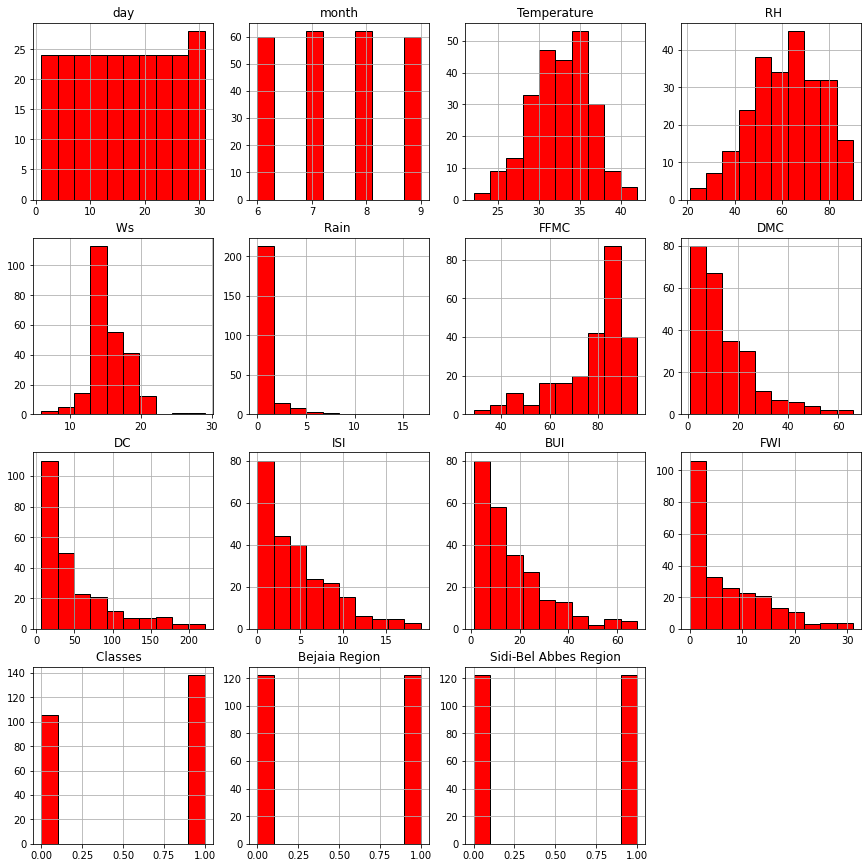

In [ ]:
df.hist(figsize=(12,12),color='r',edgecolor='black')
plt.tight_layout(pad=0.5)
plt.show()

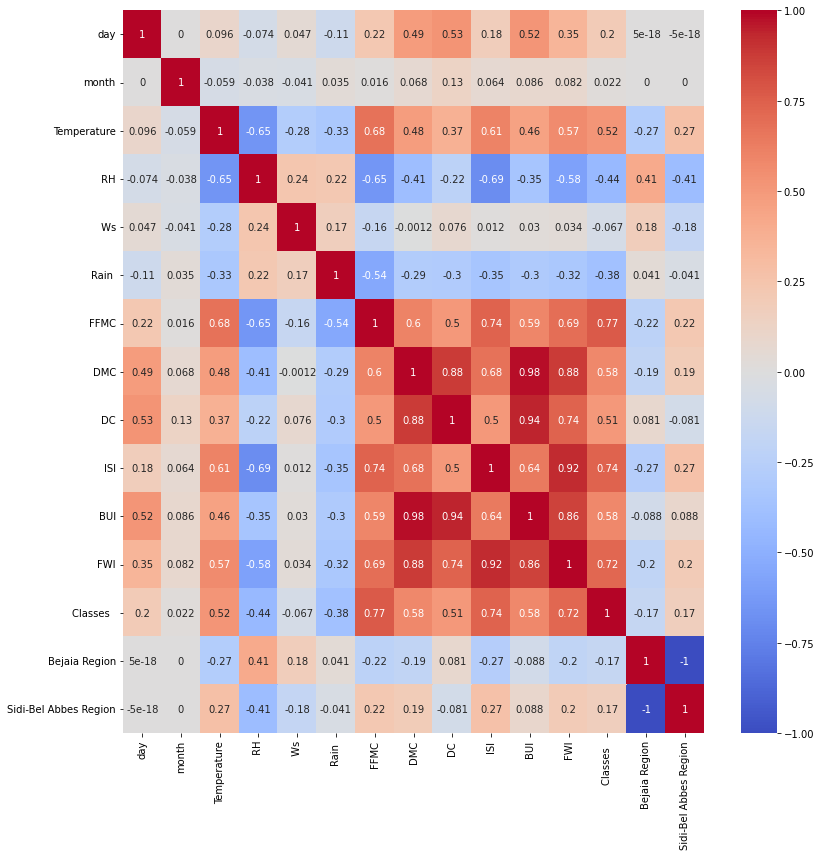

In [ ]:
corr = df.corr()           # closer to 1,-1 more is the co-relation 
plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True,cmap = "coolwarm")
plt.tight_layout()
plt.show()

### **DMC is 0.98 with BUI and 0.94 with DC and BUI is 0.94 with DC**
### **so removing DMC,DC**


In [ ]:
df.drop(['DMC','DC'],axis=1,inplace=True)
df.head(5)

,day,month,Temperature,RH,Ws,Rain,FFMC,ISI,BUI,FWI,Classes,Bejaia Region,Sidi-Bel Abbes Region
0,1,6,29,57,18,0.0,65.7,1.3,3.4,0.5,0,1.0,0.0
1,2,6,29,61,13,1.3,64.4,1.0,3.9,0.4,0,1.0,0.0
2,3,6,26,82,22,13.1,47.1,0.3,2.7,0.1,0,1.0,0.0
3,4,6,25,89,13,2.5,28.6,0.0,1.7,0.0,0,1.0,0.0
4,5,6,27,77,16,0.0,64.8,1.2,3.9,0.5,0,1.0,0.0


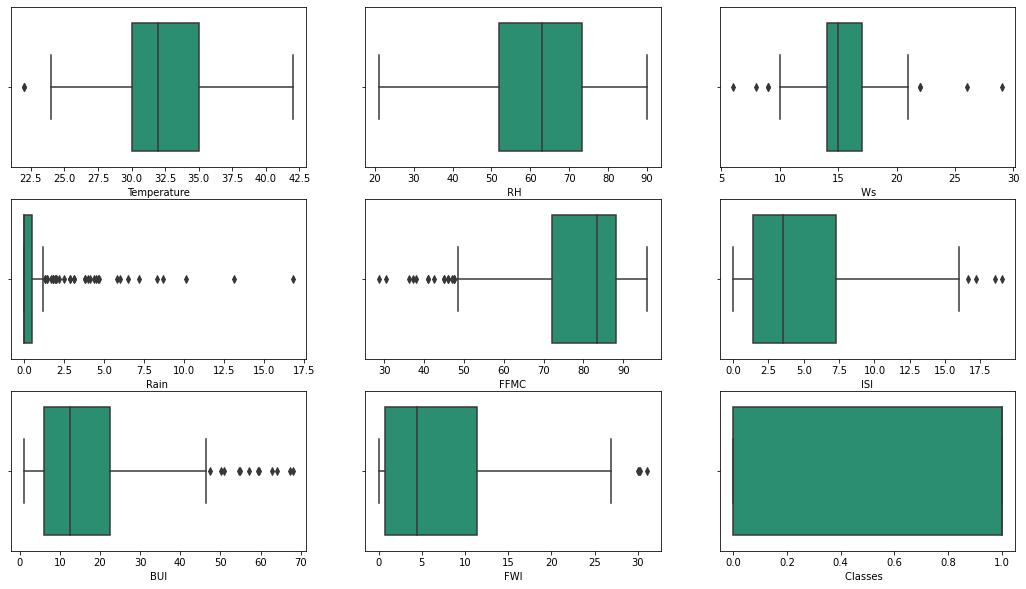

In [ ]:
plt.figure(figsize=(18,10))
plt.subplot(3,3,1)
sns.boxplot(x = df['Temperature'],palette='Dark2')
plt.subplot(3,3,2)
sns.boxplot(x = df[' RH'],palette='Dark2')
plt.subplot(3,3,3)
sns.boxplot(x = df[' Ws'],palette='Dark2')
plt.subplot(3,3,4)
sns.boxplot(x = df['Rain '],palette='Dark2')
plt.subplot(3,3,5)
sns.boxplot(x = df['FFMC'],palette='Dark2')
plt.subplot(3,3,6)
sns.boxplot(x = df['ISI'],palette='Dark2')
plt.subplot(3,3,7)
sns.boxplot(x = df['BUI'],palette='Dark2')
plt.subplot(3,3,8)
sns.boxplot(x = df['FWI'],palette='Dark2')
plt.subplot(3,3,9)
sns.boxplot(x = df["Classes  "],palette='Dark2')
plt.show()

**Treating outliers (present in BUI,Rain, FFMC,Ws)**

In [ ]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [ ]:
outlier_cols = [" Ws","Rain ","FFMC","BUI"] 
for col in outlier_cols:
  l,u = outlier_treatment(df[col])
  df[ (df[col] > u) | (df[col] < l) ]
  df.drop(df[ (df[col] > u) | (df[col] < l) ].index , inplace=True)
df.shape

(140, 13)

In [ ]:
df.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,ISI,BUI,FWI,Classes,Bejaia Region,Sidi-Bel Abbes Region
5,6,6,31,67,14,0.0,82.6,3.1,7.0,2.5,1,1.0,0.0
6,7,6,33,54,13,0.0,88.2,6.4,10.9,7.2,1,1.0,0.0
7,8,6,30,73,15,0.0,86.6,5.6,13.5,7.1,1,1.0,0.0
9,10,6,28,79,12,0.0,73.2,1.3,12.6,0.9,0,1.0,0.0
10,11,6,31,65,14,0.0,84.5,4.0,15.8,5.6,1,1.0,0.0


**splitting data**

In [ ]:
X_feature = df.loc[:, df.columns != "Classes  "]
Y_target = df.loc[:, df.columns == "Classes  "]

print(X_feature.shape)
print(Y_target.shape)

(140, 12)
(140, 1)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_feature, Y_target, test_size = 0.2,random_state = 10)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(112, 12)
(28, 12)
(112, 1)
(29, 1)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
from sklearn.metrics import accuracy_score

print("Testing Accuracy: ",accuracy_score(y_test,model.predict(X_test)))

print("----------------------------------------------")

print("Training Accuracy: ",accuracy_score(y_train,model.predict(X_train)))

Testing Accuracy:  0.9285714285714286
----------------------------------------------
Training Accuracy:  1.0


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print("Confusion Matrix : ")
cf_matrix = confusion_matrix(y_test, model.predict(X_test))
print(cf_matrix)

print("------------------------------------------------")

print("Precision Score : ")
print(precision_score(y_test, model.predict(X_test), average='micro'))

print("------------------------------------------------")

print("Recall Score : ")
print(recall_score(y_test, model.predict(X_test), average='micro'))

print("------------------------------------------------")

print("F1 Score : ")
print(f1_score(y_test, model.predict(X_test), average='micro'))

Confusion Matrix : 
[[ 4  2]
 [ 0 22]]
------------------------------------------------
Precision Score : 
0.9285714285714286
------------------------------------------------
Recall Score : 
0.9285714285714286
------------------------------------------------
F1 Score : 
0.9285714285714286


**Decision tree models using different hyper-parameter values, comapring accuracy with above decision tree model**

In [ ]:
from sklearn.model_selection import GridSearchCV
params={"criterion":["gini","entropy"],"max_depth":[2,3,4],"min_samples_split":[2,3],'max_features':[6,7,8,9,10]
        ,"splitter":["best","random"],"min_samples_leaf":[1,2,3]}

model1=DecisionTreeClassifier()
clf = GridSearchCV(model1,params)
clf.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                

In [ ]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_features': 7,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'splitter': 'best'}

In [ ]:
clf.best_score_

0.990909090909091

In [ ]:
print("Testing Accuracy: ",accuracy_score(y_test,clf.best_estimator_.predict(X_test)))
print("Training Accuracy: ",accuracy_score(y_train,clf.best_estimator_.predict(X_train)))

Testing Accuracy:  0.9285714285714286
Training Accuracy:  0.9910714285714286
